# 다중 선형 회귀분석(Multiple Linear Regression) - 독립변수가 여러 개

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


위의 Advertising의 광고는 총 200개의 행으로 이루어져있으며, 각각의 매체에 측정된 광고비를 보여주고 있습니다.

**OLS(최소제곱법) 회귀분석**

In [4]:
#회귀분석 실시 - statemodels 사용

from statsmodels.formula.api import ols

In [5]:
# 단순선형회귀분석과 동일하게 진행

model = ols('Sales ~ TV + Newspaper + Radio', data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           8.13e-99
Time:                        19:09:52   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 유의성/적합도 검증

### 모형 유의성 검정 : F검증 (분산분석)

- 모형의 유의성은 단순회귀분석과 같이 F검정에 기반하여 이루어짐(분산의 분해): MSE/MSR로 F-statistic 계산, F 분포에서 유의수준 기준 검정


- **모형 유의성 검정의 영가설(H0): (모집단에서) 모든 독립변수들의 기울기가 0이다.**

- **모형 유의성 검정의 대립가설(H1): (모집단에서) 적어도 하나의 독립변수의 기울기는 0과 다르다.**


- __F-statistic: 605.4, Prob(F-statistic)__: 8.13e-99<br>
회귀모형에 대한 (통계적) 유의성 검정 결과, 유의수준 5%에서 유의함 *(p < 0.05)*<br>
즉, 적어도 하나의 독립변수는 종속변수에 유의미한 영향을 끼침.<br>

### 회귀계수 : T검정 (두집단의 평균 비교)

- 회귀계수(기울기)의 유의성 검정은 단순회귀분석과 같이 T검정에 기반하여 이루어짐: 추정치/표준오차로 T-statistic 계산, T 분포에서 유의수준 기준 검정  <br>


- **회귀계수 유의성 검정의 영가설(H0): (모집단에서) 독립변수는 종속변수를 예측하지 못한다(기울기가 0이다).**

- **회귀계수 유의성 검정의 대립가설(H1): (모집단에서) 독립변수는 종속변수를 예측할 수 있다(기울기가 0이 아니다).**


※ **다중회귀분석의 경우 모형 유의성 검정 결과와 회귀계수 유의성 검정 결과가 다를 수 있으며, 모형이 유의하지 않으면 회귀계수도 유의하지 않다.**


- __Coef__<br>
Coef는 데이터로부터 얻은 계수의 추정치를 말한다. 다만 다중회귀분석의 경우, **'타 변수의 효과를 통제하였을 때'** 라는 전제가 붙는다는 점에 유의하여야 한다.<br>
<br>
- __Intercept__<br>
절편(Intercept)의 추정치는 4.6251로, 모든 독립변수(TV, Newspaper, Radio)가 0일 때 Sales의 값이다.<br>
<br>
- __해석 시 유의사항__<br>
TV의 계수 추정치는 0.0544로 **단순회귀분석 시의 회귀계수(0.0555)보다 작아졌음**을 확인할 수 있다. 이는 다중회귀분석 시 통계적으로 타 변수의 효과가 통제된 후 순수하게 TV가 미치는 영향력만이 추정되기 때문이며, (coeff)위 결과는 **Newspaper와 Radio의 효과가 통제되었을 때(즉, Newspaper와 Radio 광고에 동일한 정도로 노출된 사람들의 집단 내에서는), TV 광고시간이 1 증가할 때마다 Sales가 0.0544 증가한다는 것을 의미**한다.<br>

**=> y = 0.0544x1 + 0.0003x2 + 0.1070x3 + 4.6251**

### 모형의 적합도

- __Adj. R-squared__: 0.901  ==> 약 90%의 설명력을 갖는 것을 확인.
- 유의성은 Newspaper를 제외한 나머지 P-value가 0으로 유의미.
- __Durbin-Watson(더빈왓슨, DW검정)의 값__: 2.251 ==> 잔차 독립성 확인


## 예측

In [6]:
# 사이킷런의 train_test_split 활용

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data[['TV', 'Newspaper', 'Radio']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

# 7:3으로 분리(7은 학습, 3은 test)

In [7]:
# 회귀분석 모형 생성하기

data_train = LinearRegression()
data_train.fit(X_train, y_train) 

LinearRegression()

In [8]:
# 예측해보기 (리스트로 독립변수의 값 넣어주기)

advertising = [[100, 25, 50]]
data_train.predict(advertising)
#Radio,Newspaper,sale에 측정된 광고비가 위와 같을때. 예측되는 TV의 광고비

array([15.37536768])

## 평가

- 이제 X의 시험 데이터 X_test를 넣어 예측한 y 값들을 y_predict라고 저장해보자.<br>
추후에 시험 데이터에 있는 실제 정답, 즉 y_test와 비교해보기 위해서이다.<br>
만약 두 데이터 값이 일치한다면 y=x 그래프의 선으로 일치할 것이다.

In [9]:
y_predict = data_train.predict(X_test)
#X_test에 해당하는 실제 y값있으니까 둘을 비교해볼거임

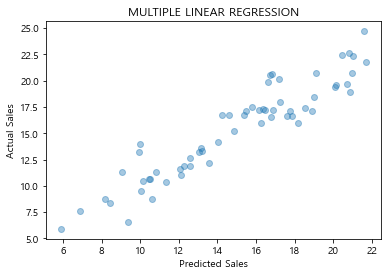

In [10]:
# 그래프로 확인해보기

plt.scatter(y_predict, y_test, alpha=0.4) #alpha = 투명도
plt.xlabel("Predicted Sales")
plt.ylabel("Actual Sales")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

=> 선으로 완전히 일치하지는 않았지만 대략적으로 선형관계를 이루고 있음을 확인할 수 있다. (이 회귀분석 괜찮은 회귀분석)

**회귀 문제를 평가하는 3가지 대표적인 지표**<br><br>

- Mean Absolute Error (평균절대편차, MAE) is the mean of the absolute value of the errors:
일반적인 에러의 평균을 계산

$$\frac{1}{n}\sum_{i=1}^{n} |y_{i}−\hat y_{i}|\ $$


 
- Mean Squared Error (평균제곱오차, MSE) is the mean of the squared errors:
오차가 큰 자료에 대해서 더 큰 패널티를 가하는 방법

$$\frac{1}{n}\sum_{i=1}^{n} (y_{i}−\hat y_{i})^2\ $$


 
- Root Mean Squared Error (평균 제곱근 편차, RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_{i}−\hat y_{i})^2}\ $$



In [11]:
from sklearn import metrics 

In [12]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted) #설명력(R-squared, 결정계수)
    return mae, mse, rmse, r2_square

In [13]:
evaluate(y_test, y_predict)

(1.2278183566589413,
 2.6360765623280664,
 1.6235998775338911,
 0.8655979373420272)

## 다중공선성 - 다중선형회귀분석에서 사용

- **공선성(collinearity)**: 하나의 독립변수가 다른 하나의 독립변수로 잘 예측되는 경우, 또는 서로 상관이 높은 경우

- **다중공선성(multicollinearity)**: 하나의 독립변수가 다른 여러 개의 독립변수들로 잘 예측되는 경우(ex. 월급&연봉)

*(다중)공선성이 있으면:

1. 계수 추정이 잘 되지 않거나 불안정해져서 데이터가 약간만 바뀌어도 추정치가 크게 달라질 수 있다
2. 계수가 통계적으로 유의미하지 않은 것처럼 나올 수 있다<br>

=> **분산팽창계수(VIF, Variance Inflation Factor)**를 구하여 판단

### VIF

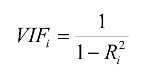

안전 : VIF < 5 : 다른 변수들이랑 관련성 별로 없다

주의 : 5 < VIF < 10

위험 : 10 < VIF : 다른 변수들이랑 너무 관련있다

In [14]:
# variance_inflation_factor(VIF) 활용

from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import pandas as pd

In [15]:
picher_df = pd.read_csv('picher_stats_2017.csv')
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [16]:
# 예측대상인 연봉(2018)을 y로 변경
picher_df=picher_df.rename(columns={'연봉(2018)' : 'y'})

<AxesSubplot:>

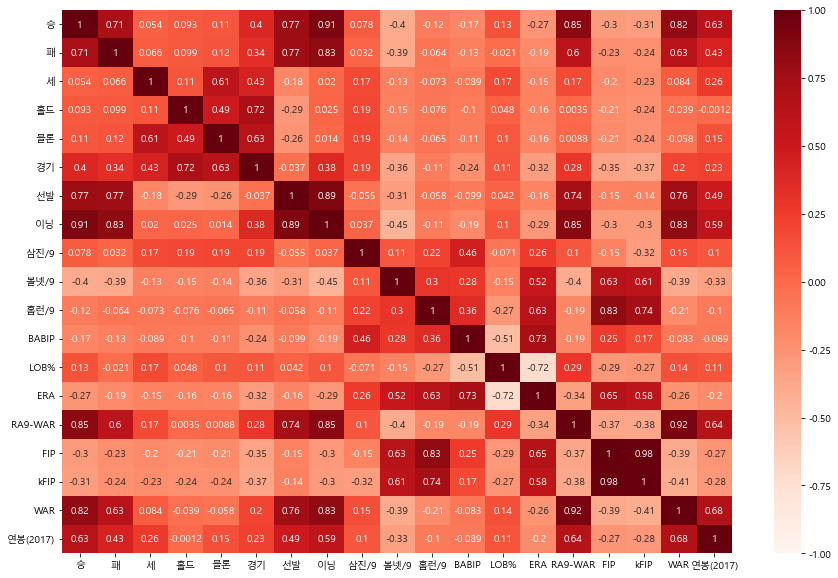

In [17]:
picher_df_corr=picher_df[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR','연봉(2017)']]
plt.rcParams['figure.figsize']=(15,10)

sns.heatmap(picher_df_corr.corr(),
          annot=True,
          cmap='Reds',
          vmin = -1, vmax = 1)

In [18]:
# 피처마다의 VIF 계수를 출력한다.

vif = pd.DataFrame()
# VIF 메서드를 활용하여 각 컬럼별 VIF 측정
vif["VIF Factor"] = [variance_inflation_factor(picher_df_corr.values, i) for i in range(picher_df_corr.shape[1])]

vif["features"] = picher_df_corr.columns

vif

,VIF Factor,features
0,13.005953,승
1,10.593260,패
2,3.303690,세
3,4.846833,홀드
4,3.578651,블론
5,43.970237,경기
6,50.361572,선발
7,138.016798,이닝
8,560.722736,삼진/9
9,122.773018,볼넷/9


**순서**<br>

1. VIF 계수가 높은 feature제거

2. 단 유사한 feature의 경우, 둘 중 1개만 제거(FIP, kFIP의 경우)<br>
(FIP:투수의 능력을 평가하는 객관적 수치, kFIP: 한국프로야구의 득점환경에 맞췌 FIP의 계수 변화를 준 지표)

3. 제거 후 VIF계수 재출력

4. (1, 2, 3)의 과정 반복

5. 회귀분석 진행

6. feature의 p-value점검

 

위 순서를 차례대로 진행한 뒤 다시 회귀분석

In [19]:
# VIF 계수 높은 feature 제거

picher_df_corr=picher_df_corr.drop(['홈런/9','kFIP',], axis=1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(picher_df_corr.values, i) for i in range(picher_df_corr.shape[1])]
vif["features"] = picher_df_corr.columns
vif

,VIF Factor,features
0,12.947608,승
1,10.468759,패
2,3.288532,세
3,4.813199,홀드
4,3.560416,블론
5,42.787750,경기
6,50.114000,선발
7,135.987840,이닝
8,13.813028,삼진/9
9,9.284762,볼넷/9


In [20]:
picher_df_corr=picher_df_corr.drop(['선발','이닝'], axis=1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(picher_df_corr.values, i) for i in range(picher_df_corr.shape[1])]
vif["features"] = picher_df_corr.columns
vif

,VIF Factor,features
0,11.324461,승
1,4.488200,패
2,2.765837,세
3,3.818716,홀드
4,3.440070,블론
5,13.937398,경기
6,13.791392,삼진/9
7,9.176246,볼넷/9
8,44.678037,BABIP
9,46.602565,LOB%


In [21]:
# 두번의 정제를 통해 얻은 feature들로 회귀분석을 진행

picher_df_corr_re=picher_df[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',"y",'연봉(2017)']]
       
X=picher_df_corr_re[picher_df_corr_re.columns.difference(['y'])]
y=picher_df_corr_re['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# 정확도 확인
lr = LinearRegression()
model = lr.fit(X_train, y_train)
print(model.score(X_train, y_train)) 
print(model.score(X_test, y_test))

0.9234628096514627
0.8889855739016463


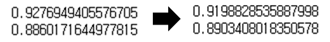

- 정제 전 vs 정제 후 train과 test 데이터의 정확도 비교

In [22]:
# feature의 p-value 확인
# 낮을수록 유의미한 영향력

import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     64.14
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           1.19e-47
Time:                        19:09:56   Log-Likelihood:                -1251.2
No. Observations:                 121   AIC:                             2542.
Df Residuals:                     101   BIC:                             2598.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.568e+04   2.01e+04      1.279      0.204   -1.41e+04    6.55e+04
BABIP      -1.455e+04    1.4e+04     -1.038      0.302   -4.24e+04    1.33e+04
ERA          -71.6181    522.129     -0.137      0.891   -1107.381     964.144
FIP         -4.53e+04   4.65e+04     -0.973      0.333   -1.38e+05     4.7e+04
LOB%        -101.6857    125.097     -0.813      0.418    -349.844     146.472
RA9-WAR     2026.7878   1542.756      1.314      0.192   -1033.625    5087.200
WAR         7740.8359   1826.361      4.238      0.000    4117.827    1.14e+04
kFIP        3.532e+04   3.72e+04      0.949      0.345   -3.85e+04    1.09e+05
경기          -126.0635    148.768     -0.847      0.399    -421.180     169.053
볼넷/9        2753.3736   2374.999      1.159      0.249   -1957.986    7464.733
블론           912.9403    722.448      1.264      0.209    -520.203    2346.084
삼진/9        1702.9273   2408.756      0.707      0.481   -3075.397    6481.251
선발          -557.8555    518.906     -1.075      0.285   -1587.226     471.515
세            -82.4149    261.484     -0.315      0.753    -601.129     436.299
승            -98.3108    549.712     -0.179      0.858   -1188.791     992.169
연봉(2017)       0.7650      0.046     16.481      0.000       0.673       0.857
이닝            33.9425    124.480      0.273      0.786    -212.993     280.878
패            531.8473    566.420      0.939      0.350    -591.778    1655.472
홀드          -241.9305    343.736     -0.704      0.483    -923.810     439.949
홈런/9        1.618e+04   1.49e+04      1.085      0.280   -1.34e+04    4.57e+04
==============================================================================
Omnibus:                       34.979   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.044
Skew:                          -0.592   Prob(JB):                     4.67e-63
Kurtosis:                      10.452   Cond. No.                     2.38e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 상호작용(교호작용 / Interaction)
(혼자 작용할때는 의미 없지만 같이 있을때 의미가짐) <br>
참고자료 : https://www.jmp.com/en_ch/statistics-knowledge-portal/what-is-multiple-regression/mlr-with-interactions.html
https://towardsdatascience.com/interaction-effect-in-multiple-regression-3091a5d0fadd

- $y = b_0 + b_1x_1 + b_2x_2 + b_3x_1x_2$ 라는 회귀식이 있다고 하자
- $y = b_0 + (b_1+ b_3x_2)x_1 + b_2x_2$
- 이때, 회귀계수$b_3$의 값은 $x_1, x_2$두 설명변수가 동시에 변화할 때 종속변수(y)가 얼만큼 영향을 받는지 의미하게 된다.

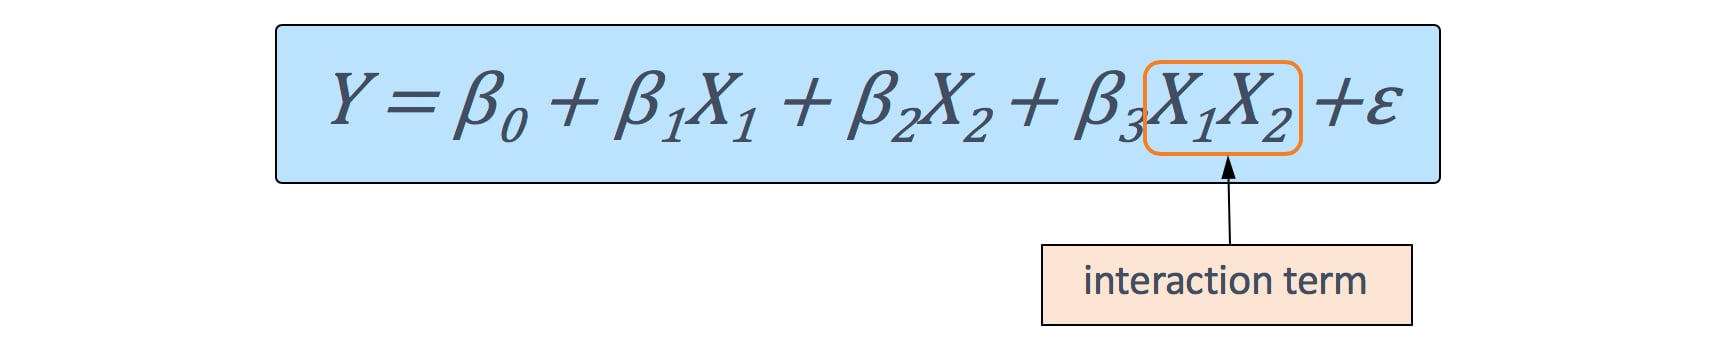

In [23]:
import pandas as pd
data = pd.read_csv('./auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


- mpg : 연비(miles per gallon)
- cylinders : 실린더수
- displacement : 배기량
- horsepower: 출력
- weight : 차 무게
- acceleration : 가속능력
- model year : 출시년도
- origin : 제조국 1(USA), 2(EU), 3(JPN)
- name : 모델명

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [25]:
#회귀분석에 관계없는 column 'car name' 삭제
data.drop('car name',axis=1,inplace=True)

#모든 column의 속성을 numeric으로 전환
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors ='coerce')
    #numeric으로 변화하는 과정에서 errors가 있다면 이를 NaN으로 대체한다.
    


-pd.to_numeric:   https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [27]:
#'horsepower'에서의 결측치를 median값으로 대체
horse_med = data['horsepower'].median()
data['horsepower'] = data['horsepower'].fillna(horse_med)

In [28]:
# OLS모델 fitting하기

from statsmodels.regression import linear_model
X = data.drop('mpg', axis=1)
y = data['mpg']
model = linear_model.OLS(y, X).fit()

#OLS회귀분석 결과 확인
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2969.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                        0.00
Time:                        19:09:57   Log-Likelihood:                         -1047.9
No. Observations:                 398   AIC:                                      2110.
Df Residuals:                     391   BIC:                                      2138.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.6512      0.322     -2.021      0.044      -1.285      -0.018
displacement     0.0211      0.008      2.764      0.006       0.006       0.036
horsepower      -0.0353      0.012     -2.860      0.004      -0.060      -0.011
weight          -0.0063      0.001     -9.692      0.000      -0.008      -0.005
acceleration    -0.0661      0.089     -0.743      0.458      -0.241       0.109
model year       0.5822      0.024     24.199      0.000       0.535       0.629
origin           1.2944      0.279      4.644      0.000       0.746       1.842
==============================================================================
Omnibus:                       46.640   Durbin-Watson:                   1.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.017
Skew:                           0.682   Prob(JB):                     1.27e-19
Kurtosis:                       4.841   Cond. No.                     5.98e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 분석 결과, 'acceleration'은 'mpg'에 유의한 영향을 미치지 않는 것으로 나타남.
- 그렇다면, 여기서 'acceleration'과 다른 Feature들의 상호작용을 통해서는 'mpg'에 유의미한 영향을 미치는지 알아볼 것 (상호작용 분석)

PolynomialFeatures: https://chana.tistory.com/entry/%ED%95%B8%EC%A6%88%EC%98%A8-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D5-%EB%8B%A4%ED%95%AD-%ED%9A%8C%EA%B7%80

https://inuplace.tistory.com/515

- 데이터가 단순한 직선 형태가 아닌 비선형 형태여도 선형 모델을 사용하여 비선형 데이터를 합습할 수 있다. 이때 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 확장된 특성을 포함한 데이터셋에 선형 모델을 휸련시키는 것인데, 이러한 기법을 다항 회귀( Polynomial Regression)라고 한다.
- 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업



In [29]:
from sklearn.preprocessing import PolynomialFeatures

#generating interaction terms
# interaction_only : True이면 거듭제곱 항은 제외 , 특성 간의 곱셈 항만 추가
#  include_bias=False : 절편을 위한 항을 제거

x_interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X)
#creating a new dataframe with the interaction terms included
interaction_df = pd.DataFrame(x_interaction, columns = ['cylinders','displacement','horsepower','weight','acceleration','year','origin',
                                                       'cylinders:displacement','cylinders:horsepower','cylinders:weight','cylinders:acceleration',
                                                       'cylinders:year','cylinders:origin','displacement:horsepower','displacement:weight',
                                                       'displacement:acceleration','displacement:year','displacement:origin','horsepower:weight',
                                                       'horsepower:acceleration','horsepower:year','horsepower:origin','weight:acceleration',
                                                       'weight:year','weight:origin','acceleration:year','acceleration:origin','year:origin'])

# 두가지 feature들을 사용한 모든 조합 생성

# 새로운 dataframe을 가지고 OLS model fitting
# y= mpg
interaction_model = linear_model.OLS(y, interaction_df).fit()

#위 모델에서 p-value값이 0.05 미만(즉, 유의한 변수들만을 추출)
interaction_model.pvalues[interaction_model.pvalues < 0.05]

displacement               3.198875e-03
horsepower                 3.598810e-02
acceleration               1.217934e-04
year                       2.633872e-13
origin                     2.401721e-03
cylinders:year             3.482406e-02
displacement:weight        2.799521e-02
displacement:year          4.856380e-03
horsepower:acceleration    3.989208e-02
acceleration:year          5.975450e-03
acceleration:origin        2.828347e-03
dtype: float64

- 분석 결과, displacement와 weight, displacement와 year, horsepower와 acceleration, acceleration과 year, acceleration과 origin 간 유의한 상호작용이 드러남. 
-  **Y에 대한 X1과 X2의 상호작용이 유의하다는 것은, Y에 대한 X1의 영향력(회귀계수, 기울기)이 X2의 값이 변화함에 따라 달라진다**, 다른 말로는 X1과 Y 사이의 관계에 대한 X2의 **조절효과(Moderation)가 있다**는 것. (X1,X2의 순서를 바꾼 해석도 동일하게 가능)
- 예컨대, 아래 그래프는 잠의 질(sleep quaility)를 예측할 때 소득과 성별 간 유의한 상호작용을 나타냄. 남성의 경우 소득 차이(월 400달러 이상, 이하)가 있어도 잠의 질의 차이는 크지 않으나, 여성의 경우 월 400달러 이상 버는 여성이 400달러 이하 버는 여성에 비해 훨씬 낮은 수준의 잠의 질을 보고하고 있음. 이는 **여성의 경우 소득이 높을 수록 잠을 제대로 자지 못한다는 연구가설을 지지**함.  
- 유의한 상호작용이 존재할 경우, Interaction Plot을 그렸을 때 두 직선의 기울기에 반드시 차이가 존재함.

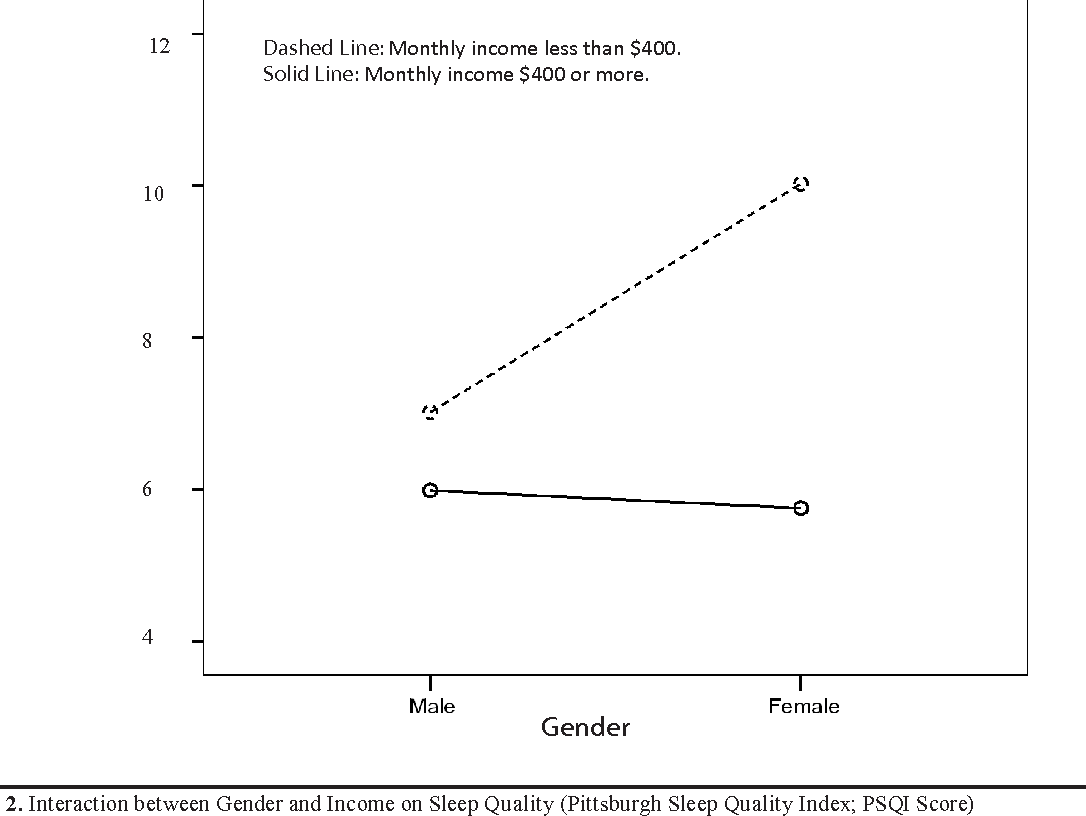

# 회귀모형의 변수 선택법

## 전진 선택법

- 기존 모형에 가장 설명력이 좋은 변수를 하나씩 추가하는 방법. 변수를 추가할지 말지 결정하는 유의수준을 정함.<br>
가장 설명력이 좋은 변수라도 유의수준을 만족하지 못하면 선택이 안됨. <br>
- 이해하기 쉽고, 변수의 개수가 많은 경우에도 사용 가능. 하지만 변수값의 작은 변동에도 그 결과가 크게 달라져 안정성 부족

## 후진 소거법

- 모든 변수가 포함된 모형에서 설명력이 가장 적은 변수 제거
- 전체 변수들의 정보를 이용하는 장점이 있는 반면 변수의 개수가 많은 경우 사용하기 어려움.

## 단계별 선택법

- 전진 선택법에서 후진 소거법 추가<br>
전진 선택법에 의해 변수를 추가하면서, 새롭게 추가된 변수에 기인해 기존 변수의 중요도가 약화되면 해당 변수를 제거하는 등 단계별로 추가 또는 제거되는 변수의 여부를 검토해 더 이상 없을 때 중단

In [30]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
 
data = pd.read_csv('./surgical_unit.csv')
data.head()

,Blood_Clotting_Score,Prognostic_Index,Enzyme_Test,Liver_Test,Age,Gender,Alc_Mod,Alc_Heavy,Survival_Time,Log_ST
0,6.7,62,81,2.59,50,0,1,0,695,6.544
1,5.1,59,66,1.70,39,0,0,0,403,5.999
2,7.4,57,83,2.16,55,0,0,0,710,6.565
3,6.5,73,41,2.01,48,0,0,0,349,5.854
4,7.8,65,115,4.30,45,0,0,1,2343,7.759


_수술단위 데이터_
- Blood_Clotting_Score : 혈액 응고 테스트 점수 
- Prognostic_Index : 예측 지수
- Enzyme_Test : 효소 기능 테스트 점수
- Liver_Test : 간 기능 테스트 점수
- Age : 연령
- Gender : 남=0, 여자=1
- Alc_Mod, 알콜 사용 이력 (Alc_Mod=0, Alc_Heavy=0 없음),(Alc_Mod=1, Alc_Heavy=0 적당),(Alc_Mod=0, Alc_Heavy=1 심각)
- Survival_Time : 생존 시간
- Log_ST : 로그 생존 시간


__(1) 전진선택법__

In [31]:
variables = data.columns[:-2].tolist() ## 설명 변수 리스트
#['Blood_Clotting_Score', 'Prognostic_Index', 'Enzyme_Test', 'Liver_Test', 'Age', 'Gender', 'Alc_Mod', 'Alc_Heavy']

y = data['Survival_Time'] ## 반응 변수
forward_selected = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(forward_selected)) #전체 열에서 전진선택법으로 선택된 변수들 제거
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        #forware_selected에 열 하나 추가
        X = data[forward_selected+[col]]
        #추가된 열의 각 값을 X에 추가
        X = sm.add_constant(X)
        #종속변수y와 독립변수 X간의 회귀분석 진행
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        forward_selected.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(data[forward_selected])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(forward_selected.copy())
    else:
        break

In [32]:
forward_selected

['Liver_Test',
 'Alc_Heavy',
 'Enzyme_Test',
 'Prognostic_Index',
 'Blood_Clotting_Score']

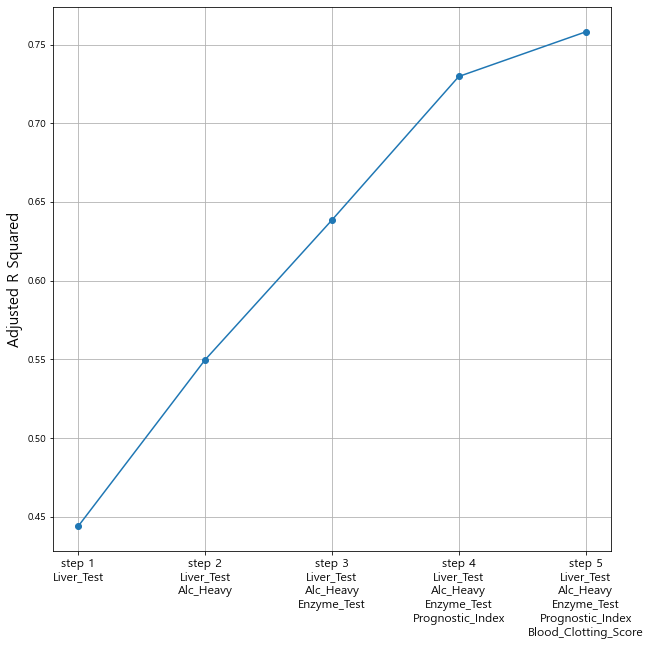

In [33]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

__(2) 후진소거법__

In [34]:
variables = data.columns[:-2].tolist() ## 설명 변수 리스트
 
y = data['Survival_Time'] ## 반응 변수
backward_selected = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(backward_selected) > 0:
    X = sm.add_constant(data[backward_selected])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        backward_selected.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(data[backward_selected])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(backward_selected.copy())
    else:
        break

In [35]:
backward_selected

['Blood_Clotting_Score', 'Prognostic_Index', 'Enzyme_Test', 'Alc_Heavy']

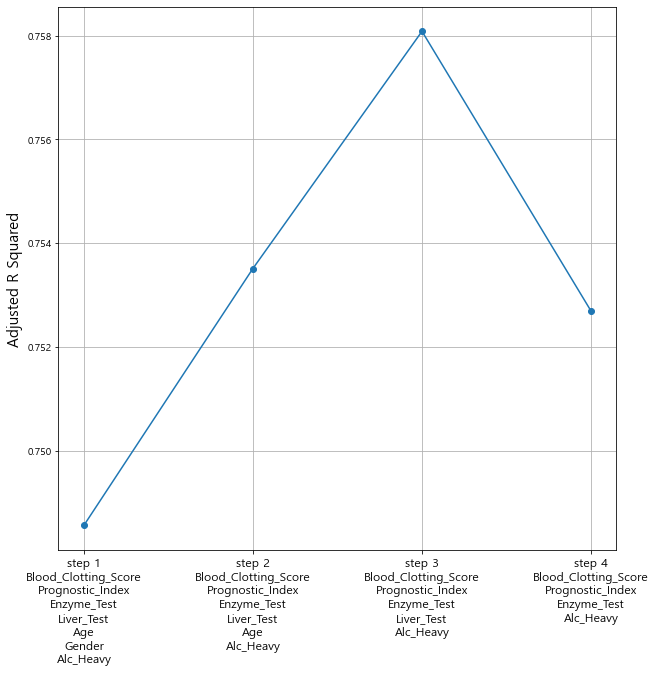

In [36]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

__(3) 단계별 선택법__

In [37]:
variables = data.columns[:-2].tolist() ## 설명 변수 리스트
 
y = data['Survival_Time'] ## 반응 변수
stepwise_selected = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(stepwise_selected))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = data[stepwise_selected+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        stepwise_selected.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(stepwise_selected) > 0:
            selected_X = data[stepwise_selected]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                stepwise_selected.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(data[stepwise_selected])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(stepwise_selected.copy())
    else:
        break

In [38]:
stepwise_selected

['Alc_Heavy', 'Enzyme_Test', 'Prognostic_Index', 'Blood_Clotting_Score']

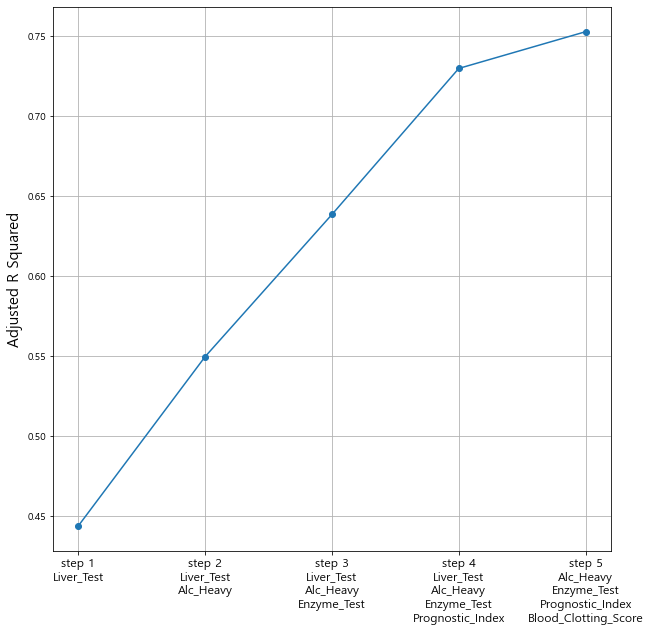

In [39]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [40]:
print("전진선택법:", forward_selected)
print("후진소거법:",backward_selected)
print("단계별 선택법:",stepwise_selected)

전진선택법: ['Liver_Test', 'Alc_Heavy', 'Enzyme_Test', 'Prognostic_Index', 'Blood_Clotting_Score']
후진소거법: ['Blood_Clotting_Score', 'Prognostic_Index', 'Enzyme_Test', 'Alc_Heavy']
단계별 선택법: ['Alc_Heavy', 'Enzyme_Test', 'Prognostic_Index', 'Blood_Clotting_Score']


- 참고: https://zephyrus1111.tistory.com/65